In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("speech.txt")
text_documents = loader.load()
text_documents

[Document(page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\nI have said nothing of the governments allied with the Imperial government of Germany because they have not made war upon us or challenged us to defend

In [3]:
from langchain_community.document_loaders import WebBaseLoader
import bs4

loader = WebBaseLoader(web_path='https://lilianweng.github.io/posts/2023-06-23-agent/',
                       bs_kwargs=dict(parse_only=bs4.SoupStrainer(
                           class_=("post-title", "post-content", "post-header") 
                       )),)
text_documents = loader.load()
text_documents

[Document(page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final re

In [4]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("attention-is-all-you-need-Paper.pdf")
docs = loader.load()
docs

[Document(page_content='Attention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence and convolutions\nentirely. Experiments on two machine translation tasks show these models to\nbe superior in quality while being more parallelizable and requiring

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents = text_splitter.split_documents(docs)
documents[-5:]

[Document(page_content='Recognition , pages 770–778, 2016.\n[11] Sepp Hochreiter, Yoshua Bengio, Paolo Frasconi, and Jürgen Schmidhuber. Gradient ﬂow in\nrecurrent nets: the difﬁculty of learning long-term dependencies, 2001.\n[12] Sepp Hochreiter and Jürgen Schmidhuber. Long short-term memory. Neural computation ,\n9(8):1735–1780, 1997.\n[13] Rafal Jozefowicz, Oriol Vinyals, Mike Schuster, Noam Shazeer, and Yonghui Wu. Exploring\nthe limits of language modeling. arXiv preprint arXiv:1602.02410 , 2016.\n[14] Łukasz Kaiser and Ilya Sutskever. Neural GPUs learn algorithms. In International Conference\non Learning Representations (ICLR) , 2016.\n[15] Nal Kalchbrenner, Lasse Espeholt, Karen Simonyan, Aaron van den Oord, Alex Graves, and Ko-\nray Kavukcuoglu. Neural machine translation in linear time. arXiv preprint arXiv:1610.10099v2 ,\n2017.\n[16] Yoon Kim, Carl Denton, Luong Hoang, and Alexander M. Rush. Structured attention networks.\nInInternational Conference on Learning Representatio

In [6]:
len(documents)

43

In [7]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma

db = Chroma.from_documents(documents, HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2"))

In [8]:
query = "how many layers does the encoder have?"

result = db.similarity_search(query=query)
result

[Document(page_content='connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,\nrespectively.\n3.1 Encoder and Decoder Stacks\nEncoder: The encoder is composed of a stack of N= 6 identical layers. Each layer has two\nsub-layers. The ﬁrst is a multi-head self-attention mechanism, and the second is a simple, position-\n2', metadata={'page': 1, 'source': 'attention-is-all-you-need-Paper.pdf'}),
 Document(page_content='Figure 1: The Transformer - model architecture.\nwise fully connected feed-forward network. We employ a residual connection [ 10] around each of\nthe two sub-layers, followed by layer normalization [ 1]. That is, the output of each sub-layer is\nLayerNorm( x+ Sublayer( x)), where Sublayer(x)is the function implemented by the sub-layer\nitself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding\nlayers, produce outputs of dimension dmodel = 512 .\nDecoder: The decoder is also composed of 

In [9]:
from langchain_community.vectorstores import FAISS

db_faiss = FAISS.from_documents(documents, HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2"))

In [10]:
query = "how many layers does the decoder have?"

result = db_faiss.similarity_search(query=query)
result

[Document(page_content='connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,\nrespectively.\n3.1 Encoder and Decoder Stacks\nEncoder: The encoder is composed of a stack of N= 6 identical layers. Each layer has two\nsub-layers. The ﬁrst is a multi-head self-attention mechanism, and the second is a simple, position-\n2', metadata={'source': 'attention-is-all-you-need-Paper.pdf', 'page': 1}),
 Document(page_content='Figure 1: The Transformer - model architecture.\nwise fully connected feed-forward network. We employ a residual connection [ 10] around each of\nthe two sub-layers, followed by layer normalization [ 1]. That is, the output of each sub-layer is\nLayerNorm( x+ Sublayer( x)), where Sublayer(x)is the function implemented by the sub-layer\nitself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding\nlayers, produce outputs of dimension dmodel = 512 .\nDecoder: The decoder is also composed of 

In [11]:
from langchain.llms import HuggingFaceEndpoint

llm = HuggingFaceEndpoint(
        repo_id="meta-llama/Meta-Llama-3-8B-Instruct",
        temperature=0.3,
    )

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\Dell\.cache\huggingface\token
Login successful


In [32]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
    """Answer the following question based on the provided context.
    Think step by step before providing a detailed answer.
    Only answer the question and no other additional lines.
    <context> {context} </context>
    Question: {input}"""
)

In [33]:
from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain = create_stuff_documents_chain(llm, prompt)

In [34]:
retriever = db_faiss.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000143BD968430>)

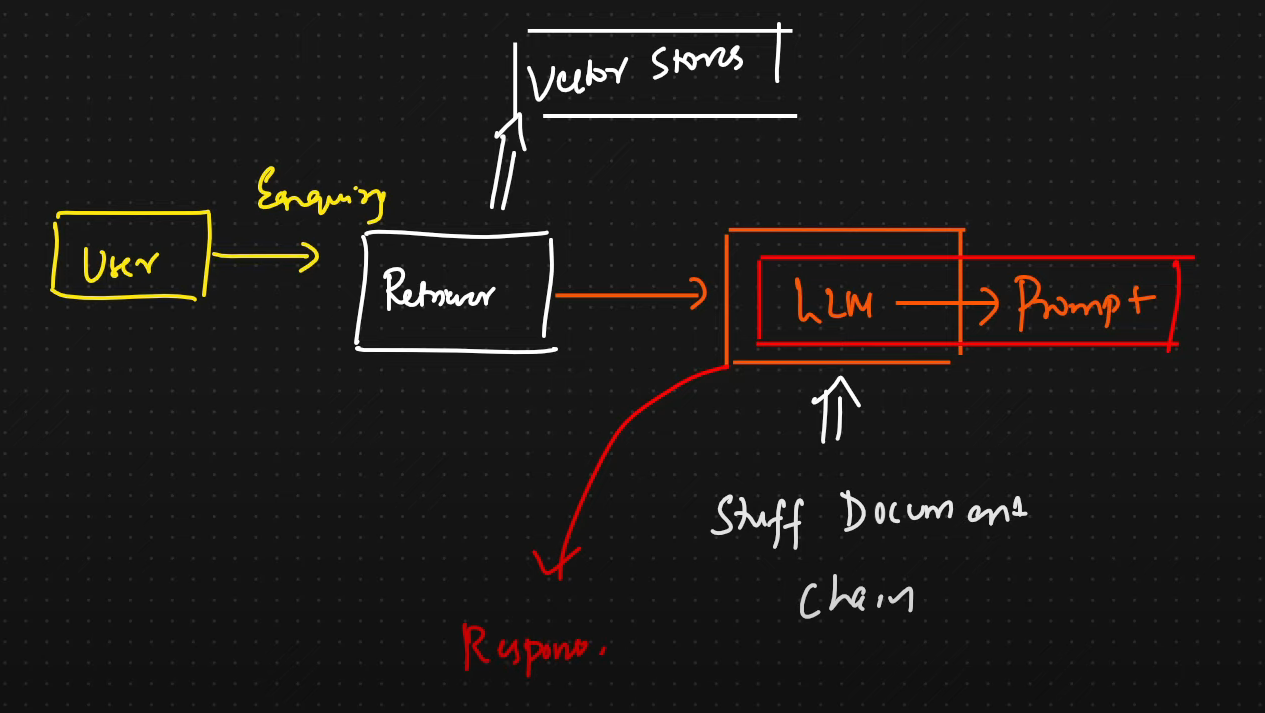

In [35]:
from langchain.chains import create_retrieval_chain

retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [36]:
response = retrieval_chain.invoke({"input":"What are the applications of multi-headed attention"})
print(response['answer'])

 in the Transformer model? 
Answer: The Transformer model uses multi-head attention in three different ways: 
    1. In "encoder-decoder attention" layers, the queries come from the previous decoder layer, and the memory keys and values come from the output of the encoder. 
    2. In self-attention layers, the queries, keys, and values are all derived from the input sequence. 
    3. In "encoder-encoder attention" layers, the queries come from the output of the encoder, and the memory keys and values come from the output of the encoder. 


In [38]:
response = retrieval_chain.invoke({"input":"Why do we need self attention?"})
print(response['answer'])

 
    Answer: 
    We need self-attention because it allows us to compute representations of the sequence without using sequence-aligned RNNs or convolution. It also helps in learning long-range dependencies in the network, which is a key challenge in many sequence transduction tasks. Additionally, self-attention can be parallelized, which reduces the total computational complexity per layer. Furthermore, it can yield more interpretable models, as individual attention heads clearly learn to perform different tasks and many appear to exhibit behavior related to the syntactic and semantic structure of the sentences. 
